In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
cabbage_df = pd.read_excel("data-files/양배추_가격.xlsx", engine='openpyxl')

In [284]:
cabbage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16568 entries, 0 to 16567
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     16568 non-null  object 
 1   거래단위     16568 non-null  object 
 2   평균가격     16568 non-null  object 
 3   총거래물량    16568 non-null  float64
 4   총거래금액    16568 non-null  int64  
 5   도매시장     16568 non-null  object 
 6   도매법인     16568 non-null  object 
 7   품목       16568 non-null  object 
 8   품종       16568 non-null  object 
 9   산지-광역시도  16568 non-null  object 
 10  산지-시군구   16568 non-null  object 
 11  등급       16568 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.5+ MB


In [285]:
cabbage_df['DATE'] = pd.to_datetime(cabbage_df['DATE'], format='%Y-%m')

In [286]:
cabbage_df['산지-시군구'].unique()

array(['강원도', '정선군', '평창군', '삼척시', '제주시', '서산시', '횡성군', '전라남도', '괴산군',
       '무안군', '홍천군', '해남군', '충청남도', '보은군', '청원군', '-', '청주시', '춘천시',
       '태백시', '김천시', '광주광역시', '강릉시', '서울특별시', '영월군', '부산광역시', '제주도',
       '창녕군', '송파구', '창원시', '진해시', '경상북도', '태안군', '고창군', '인제군', '중구',
       '장수군', '봉화군', '예산군', '강서구', '양구군', '익산시', '동구', '전주시', '논산시',
       '당진시', '서구', '정읍시', '진도군', '홍성군', '부안군', '중국', '경기도', '천안시',
       '대구광역시', '포천시', '마산시', '원주시', '청송군', '평택시', '사상구', '달성군', '강남구',
       '무주군', '영양군', '안동시', '포항시', '남제주군', '고흥군', '김제시', '구리시', '공주시',
       '상주시', '경상남도', '김해시', '제천시', '완주군', '여주군', '임실군', '보성군', '남해군',
       '광양시', '남원시', '세종시', '북구', '기장군', '충주시', '옥천군', '구미시', '북제주군',
       '고양시', '계룡시', '대덕구', '영암군', '경산시', '파주시', '영광군', '김포시', '진주시',
       '고령군', '아산시', '담양군', '함안군', '단양군', '영덕군', '경주시', '칠곡군', '화성시',
       '진안군', '철원군', '계양구', '남양주시', '울산광역시', '청도군', '순천시', '양주시', '강화군',
       '증평군', '신안군', '거제시', '안성시', '관악구', '음성군', '대전광역시', '서귀포시', '하동군',
       '안산시', 

In [287]:
cabbage_df['도매시장'].unique()

array(['구리도매시장', '대전오정도매', '인천구월도매', '서울강서도매', '수원도매시장', '광주각화도매',
       '순천도매시장', '대전노은도매', '안양도매시장', '전주도매시장', '광주서부도매', '청주도매시장',
       '원주도매시장', '천안도매시장', '안산도매시장', '부산엄궁도매', '창원내서도매시장', '창원팔용도매시장',
       '춘천도매시장', '대구북부도매', '부산반여도매', '정읍도매시장', '진주도매시장', '인천삼산도매',
       '울산도매시장', '서울가락도매', '포항도매시장', '강릉도매시장', '충주도매시장', '구미도매시장'],
      dtype=object)

In [288]:
cabbage_df['산지-광역시도'].unique()

array(['강원도', '제주', '충청남도', '전라남도', '충북', '전남', '강원', '충청북도', '충남', '-',
       '경북', '광주광역시', '서울특별시', '부산광역시', '제주도', '경상남도', '서울', '경상북도', '경남',
       '전북', '부산', '대구', '광주', '전라북도', '중국', '경기도', '대구광역시', '경기', '인천',
       '세종시', '대전광역시', '울산광역시', '인천광역시', '울산', '대전', '수입산'], dtype=object)

In [289]:
# 산지-광역시도 기준 디렉토리

region_sum = {
    '충남': '충청남도', 
    '강원': '강원도', 
    '제주':'제주도', 
    '전남' : '전라남도',
    '전북' : '전라북도', 
    '강원' : '강원도',
    '충북' : '충청북도',
    '부산' : '부산광역시',
    '경남' : '경상남도',
    '서울' : '서울특별시',
    '광주' : '광주광역시', 
    '경북' : '경상북도',
    '경기' : '경기도',
    '인천' : '인천광역시',
    '대구' : '대구광역시',
    '울산' : '울산광역시',
    '대전' : '대전광역시'
}

In [290]:
# 시각화 하기 위해서 평균가격, 총거래물량, 도매시장, 산지-광역시도 컬럼만 가져오기

cabbage_df['평균가격'] = pd.to_numeric(cabbage_df['평균가격'], errors='coerce')
cabbage_df['총거래물량'] = pd.to_numeric(cabbage_df['총거래물량'], errors='coerce')


cabbage_df_cleaned = cabbage_df.dropna(subset=['평균가격', '총거래물량', '도매시장', '산지-광역시도'])


# 가중치
cabbage_df_cleaned['weighted_price'] = (
    cabbage_df_cleaned['평균가격'] * cabbage_df_cleaned['총거래물량']
)


# 산지-광역시도 데이터를 위에서 만든 기준 디렉토리를 이용하여 변경
# 충북 = 충청북도, 충남 = 충청남도 등

cabbage_df_cleaned['산지-광역시도'] = cabbage_df_cleaned['산지-광역시도'].replace(region_sum)


# 도매시장별로 그룹화
weighted_avg_market = (
    cabbage_df_cleaned.groupby(['DATE', '도매시장']).apply(
        lambda g: g['weighted_price'].sum() / g['총거래물량'].sum()
    ).reset_index(name='가중평균가격')
)

# 광역시도별로 그룹화
weighted_avg_ragion = (
    cabbage_df_cleaned.groupby(['DATE', '산지-광역시도'])
    .apply(lambda g: g['weighted_price'].sum() / g['총거래물량'].sum())
    .reset_index(name='가중평균가격')
)

C:\Users\human\AppData\Local\Temp\ipykernel_12048\3448614163.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabbage_df_cleaned['weighted_price'] = (
C:\Users\human\AppData\Local\Temp\ipykernel_12048\3448614163.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabbage_df_cleaned['산지-광역시도'] = cabbage_df_cleaned['산지-광역시도'].replace(region_sum)
C:\Users\human\AppData\Local\Temp\ipykernel_12048\3448614163.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is

In [291]:
weighted_avg_market['도매시장'].unique()

array(['강릉도매시장', '광주각화도매', '광주서부도매', '구리도매시장', '구미도매시장', '대구북부도매',
       '대전노은도매', '대전오정도매', '부산반여도매', '부산엄궁도매', '서울강서도매', '수원도매시장',
       '순천도매시장', '안산도매시장', '울산도매시장', '원주도매시장', '인천구월도매', '전주도매시장',
       '진주도매시장', '창원내서도매시장', '창원팔용도매시장', '천안도매시장', '춘천도매시장', '포항도매시장',
       '서울가락도매', '충주도매시장', '인천삼산도매', '청주도매시장', '안양도매시장', '정읍도매시장'],
      dtype=object)

<Figure size 1400x800 with 0 Axes>

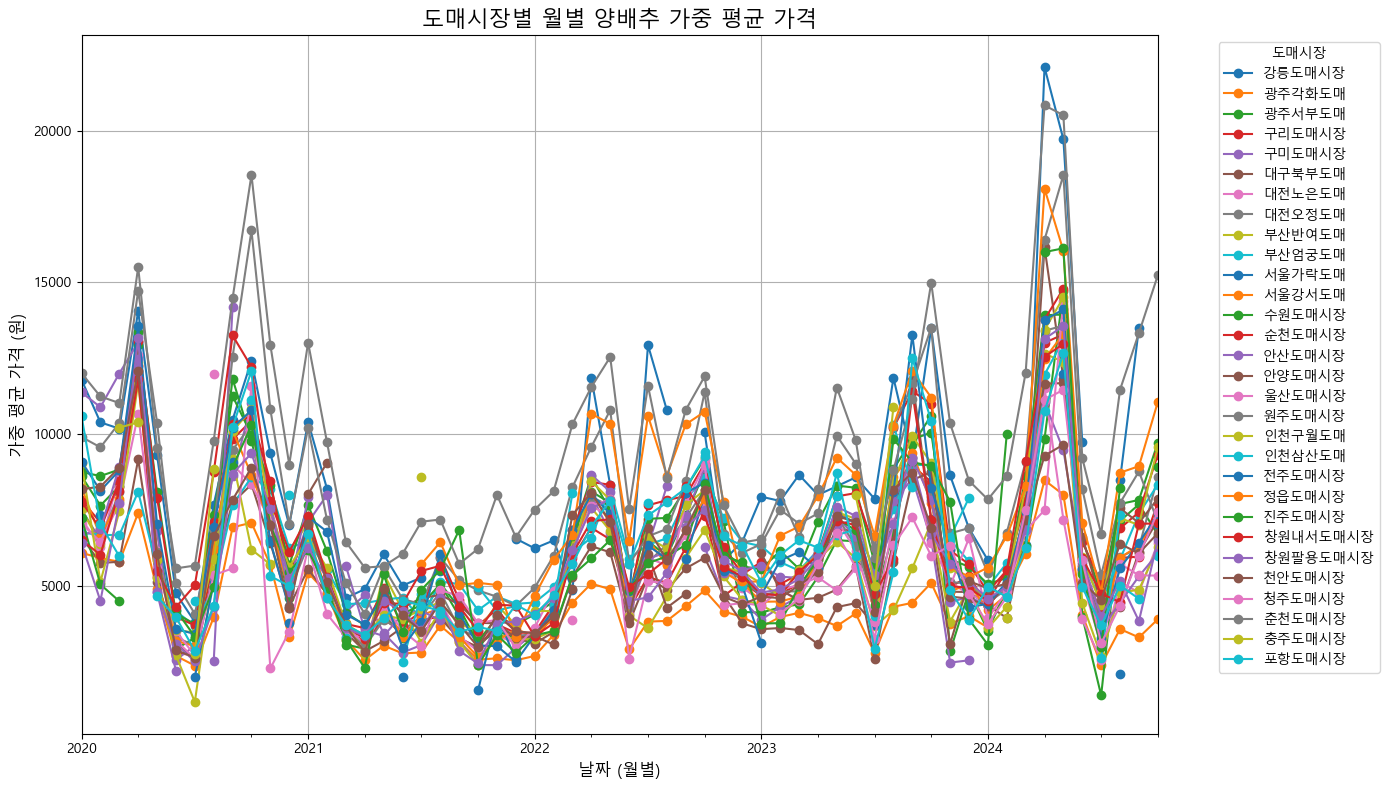

In [292]:
#도매시장별 월별 가격 시각화

import matplotlib.pyplot as plt

#한글
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


cabbage_market_pivot = weighted_avg_market.pivot(index='DATE', columns='도매시장', values='가중평균가격')

plt.figure(figsize=(14, 8))
cabbage_market_pivot.plot(kind='line', figsize=(14, 8), marker='o')

plt.title('도매시장별 월별 양배추 가중 평균 가격', fontsize=16)
plt.xlabel('날짜 (월별)', fontsize=12)
plt.ylabel('가중 평균 가격 (원)', fontsize=12)
plt.grid(True)
plt.legend(title='도매시장', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [244]:
cabbage_df_cleaned['산지-광역시도'].unique()

array(['강원도', '제주도', '충청남도', '전라남도', '충청북도', '-', '경상북도', '광주광역시',
       '서울특별시', '부산광역시', '경상남도', '전라북도', '대구광역시', '중국', '경기도', '인천광역시',
       '세종시', '대전광역시', '울산광역시', '수입산'], dtype=object)

<Figure size 1400x800 with 0 Axes>

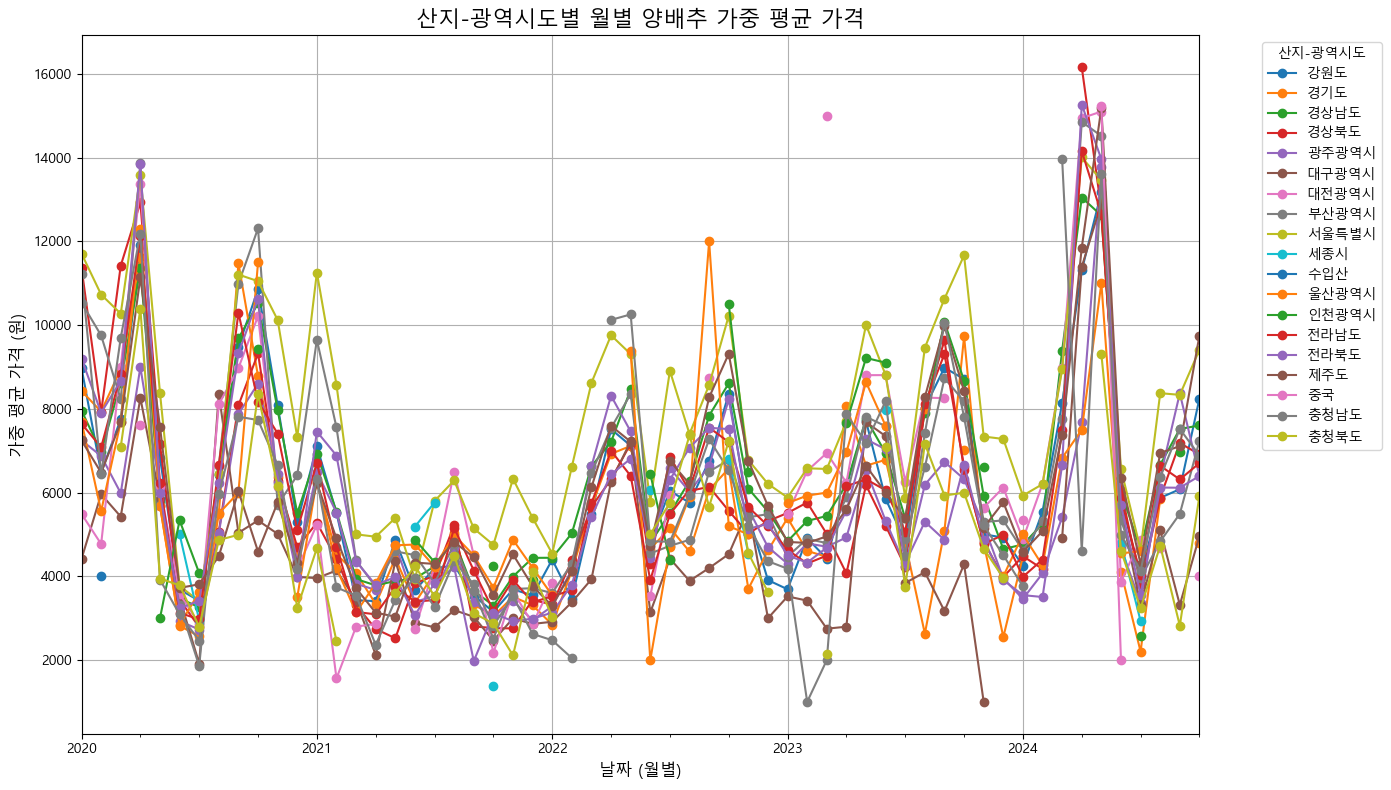

In [282]:
#광역시도별 월별 가격시각화

import matplotlib.pyplot as plt

#한글
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

weighted_avg_ragion = weighted_avg_ragion[weighted_avg_ragion['산지-광역시도'] != '-']

cabbage_ragion_pivot = weighted_avg_ragion.pivot(index='DATE', columns='산지-광역시도', values='가중평균가격')

plt.figure(figsize=(14, 8))
cabbage_ragion_pivot.plot(kind='line', figsize=(14, 8), marker='o')

plt.title('산지-광역시도별 월별 양배추 가중 평균 가격', fontsize=16)
plt.xlabel('날짜 (월별)', fontsize=12)
plt.ylabel('가중 평균 가격 (원)', fontsize=12)
plt.grid(True)
plt.legend(title='산지-광역시도', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [246]:
# cabbage_df_cleaned.to_csv("data-files/cabbage_df_cleaned.csv", index=False)

In [247]:
# 기후 데이터 가져오기

weather_final = pd.read_csv("data-files/weather_final.csv")

In [248]:
weather_final['DATE'] = pd.to_datetime(weather_final['DATE'], format='%Y-%m')

In [249]:
cabbage_df_cleaned

,DATE,거래단위,평균가격,총거래물량,총거래금액,도매시장,도매법인,품목,품종,산지-광역시도,산지-시군구,등급,weighted_price
0,2024-10-01,10kg그물망,9095.258005,385070.0,350231100,구리도매시장,농협구리(공),양배추,양배추(일반),강원도,강원도,특,3.502311e+09
1,2024-10-01,10kg그물망,9708.371697,375790.0,364830900,대전오정도매,대전청과,양배추,양배추(일반),강원도,정선군,.,3.648309e+09
2,2024-10-01,10kg그물망,6569.604190,185190.0,121662500,구리도매시장,인터넷청과,양배추,양배추(일반),강원도,정선군,특,1.216625e+09
3,2024-10-01,10kg그물망,7937.896750,130750.0,103788000,구리도매시장,구리청과,양배추,양배추(일반),강원도,평창군,등외,1.037880e+09
4,2024-10-01,10kg그물망,6517.980576,114290.0,74494000,구리도매시장,인터넷청과,양배추,양배추(일반),강원도,삼척시,특,7.449400e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16563,2020-01-01,10kg그물망,1000.000000,40.0,4000,광주서부도매,두레청과,양배추,양배추(일반),전라남도,진도군,상,4.000000e+04
16564,2020-01-01,10kg그물망,18000.000000,20.0,36000,인천구월도매,구월원협(공),양배추,양배추(일반),전라남도,나주시,특,3.600000e+05
16565,2020-01-01,10kg그물망,12000.000000,20.0,24000,전주도매시장,전주원협(공),양배추,양배추(일반),전라북도,전주시,보통,2.400000e+05
16566,2020-01-01,10kg그물망,1300.000000,20.0,2600,순천도매시장,순천원협(공),양배추,양배추(일반),제주도,북제주군,등외,2.600000e+04


In [250]:
merged_df = cabbage_df_cleaned.merge(
    weather_final,
    left_on=['DATE', '산지-광역시도'],
    right_on=['DATE', '광역시도'],
    how='left'
)

In [251]:
# merged_df.to_csv("data-files/merged_df.csv", index = False)

In [252]:
merged_df['DATE'] = merged_df['DATE'].dt.to_period('M').dt.to_timestamp()

In [253]:
merged_df = merged_df.drop(columns=['총거래금액', '산지-시군구', '품목', '품종', '도매법인'])
merged_df = merged_df[merged_df['등급'] == '특']

In [254]:
merged_df = merged_df[~merged_df['산지-광역시도'].isin(['중국', '-'])]

In [255]:
merged_df

,DATE,거래단위,평균가격,총거래물량,도매시장,산지-광역시도,등급,weighted_price,광역시도,평균기온,평균풍속,평균강수량
0,2024-10-01,10kg그물망,9095.258005,385070.0,구리도매시장,강원도,특,3.502311e+09,강원도,12.93,1.56,130.36
2,2024-10-01,10kg그물망,6569.604190,185190.0,구리도매시장,강원도,특,1.216625e+09,강원도,12.93,1.56,130.36
4,2024-10-01,10kg그물망,6517.980576,114290.0,구리도매시장,강원도,특,7.449400e+08,강원도,12.93,1.56,130.36
5,2024-10-01,10kg그물망,10033.179519,112690.0,인천구월도매,제주도,특,1.130639e+09,제주도,18.36,3.63,194.00
11,2024-10-01,10kg그물망,6822.118789,76270.0,구리도매시장,충청남도,특,5.203230e+08,충청남도,16.32,2.29,92.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2020-01-01,10kg그물망,3066.666667,150.0,광주서부도매,전라남도,특,4.600000e+05,전라남도,4.65,2.77,77.65
16552,2020-01-01,10kg그물망,9500.000000,120.0,창원내서도매시장,서울특별시,특,1.140000e+06,서울특별시,1.85,1.35,55.52
16555,2020-01-01,10kg그물망,10500.000000,60.0,진주도매시장,제주도,특,6.300000e+05,제주도,6.06,3.90,163.16
16558,2020-01-01,10kg그물망,18000.000000,20.0,인천구월도매,전라남도,특,3.600000e+05,전라남도,4.65,2.77,77.65


In [256]:
# 각 재배 방식에 대한 파종 시기와 수확 시기 정의
cultivation_periods = {
    "봄재배": {"planting": [3, 4, 5, 6], "harvesting": [6, 7]},
    "가을재배": {"planting": [7, 8, 9, 10], "harvesting": [10, 11]},
    "월동재배": {"planting": [9, 10, 11], "harvesting": [3, 4, 5]},
    "여름재배": {"planting": [5, 6, 7, 8], "harvesting": [9]}
}

# 각 재배 방식에 대한 상관관계 결과를 저장할 딕셔너리
results = {}

for crop, periods in cultivation_periods.items():
    planting_months = periods['planting']  # 파종 시기 월 정의
    harvesting_months = periods['harvesting']  # 수확 시기 월 정의
    
    # 파종 시기 기후 데이터를 연도별로 집계
    planting_climate_data = (
        merged_df[merged_df['DATE'].dt.month.isin(planting_months)]
        .groupby(merged_df['DATE'].dt.year)
        .mean(numeric_only=True)[['평균기온', '평균풍속', '평균강수량']]
        .rename_axis('YEAR')  # 연도를 인덱스로 사용
    )
    
    # 수확 시기 총 거래물량을 연도별로 집계
    harvesting_transaction_data = (
        merged_df[merged_df['DATE'].dt.month.isin(harvesting_months)]
        .groupby(merged_df['DATE'].dt.year)['총거래물량']
        .sum()
        .rename_axis('YEAR')  # 연도를 인덱스로 사용
    )
    
    # 상관관계 분석을 위해 데이터를 병합
    combined_analysis_data = planting_climate_data.merge(
        harvesting_transaction_data,
        left_index=True,
        right_index=True
    )
    
    # 상관관계 계산
    correlation_results = combined_analysis_data.corr().loc['총거래물량'].drop('총거래물량')
    results[crop] = correlation_results  # 결과 저장

# 결과를 하나의 데이터프레임으로 변환하여 표시
correlation_results_df = pd.DataFrame(results).transpose()

In [257]:
correlation_results_df

,평균기온,평균풍속,평균강수량
봄재배,-0.132670,0.547960,-0.795771
가을재배,-0.603615,-0.740804,-0.353241
월동재배,-0.487433,0.473492,-0.648265
여름재배,-0.271701,-0.048232,-0.716378


In [258]:
import pandas as pd
# Dictionary to store correlation results for each cultivation type
results = {}

for crop, periods in cultivation_periods.items():
    planting_months = periods['planting']
    harvesting_months = periods['harvesting']
    
    # Aggregating planting data
    planting_data = (
        merged_df[merged_df['DATE'].dt.month.isin(planting_months)]
        .groupby(merged_df['DATE'].dt.year)
        .mean(numeric_only=True)[['평균가격']]
        .rename_axis('YEAR')
    )
    
    # Aggregating harvesting data
    harvesting_data = (
        merged_df[merged_df['DATE'].dt.month.isin(harvesting_months)]
        .groupby(merged_df['DATE'].dt.year)['총거래물량']
        .sum()
        .rename_axis('YEAR')
    )
    
    # Merging planting and harvesting data
    combined_data = planting_data.merge(
        harvesting_data,
        left_index=True,
        right_index=True
    )
    
    # Calculating correlations
    correlation_results = combined_data.corr().loc['총거래물량'].drop('총거래물량')
    results[crop] = correlation_results

# Converting results into a DataFrame
correlation_results_df = pd.DataFrame(results).transpose()

In [259]:
correlation_results_df

,평균가격
봄재배,-0.422614
가을재배,-0.270507
월동재배,-0.691609
여름재배,-0.647840


In [260]:
merged_df

,DATE,거래단위,평균가격,총거래물량,도매시장,산지-광역시도,등급,weighted_price,광역시도,평균기온,평균풍속,평균강수량
0,2024-10-01,10kg그물망,9095.258005,385070.0,구리도매시장,강원도,특,3.502311e+09,강원도,12.93,1.56,130.36
2,2024-10-01,10kg그물망,6569.604190,185190.0,구리도매시장,강원도,특,1.216625e+09,강원도,12.93,1.56,130.36
4,2024-10-01,10kg그물망,6517.980576,114290.0,구리도매시장,강원도,특,7.449400e+08,강원도,12.93,1.56,130.36
5,2024-10-01,10kg그물망,10033.179519,112690.0,인천구월도매,제주도,특,1.130639e+09,제주도,18.36,3.63,194.00
11,2024-10-01,10kg그물망,6822.118789,76270.0,구리도매시장,충청남도,특,5.203230e+08,충청남도,16.32,2.29,92.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2020-01-01,10kg그물망,3066.666667,150.0,광주서부도매,전라남도,특,4.600000e+05,전라남도,4.65,2.77,77.65
16552,2020-01-01,10kg그물망,9500.000000,120.0,창원내서도매시장,서울특별시,특,1.140000e+06,서울특별시,1.85,1.35,55.52
16555,2020-01-01,10kg그물망,10500.000000,60.0,진주도매시장,제주도,특,6.300000e+05,제주도,6.06,3.90,163.16
16558,2020-01-01,10kg그물망,18000.000000,20.0,인천구월도매,전라남도,특,3.600000e+05,전라남도,4.65,2.77,77.65


In [261]:
import pandas as pd
import numpy as np

# 'Month' 열 추가: 날짜(DATE) 열에서 월 정보를 추출하여 새 열에 저장
merged_df['Month'] = pd.to_datetime(merged_df['DATE']).dt.month

# 재배 기간 정의 (봄, 가을, 월동, 여름 재배의 파종 및 수확 기간 설정)
cultivation_periods = {
    "봄재배": {"planting": [3, 4, 5, 6], "harvesting": [6, 7]},       # 봄 재배의 파종 및 수확 월
    "가을재배": {"planting": [7, 8, 9, 10], "harvesting": [10, 11]},  # 가을 재배의 파종 및 수확 월
    "월동재배": {"planting": [9, 10, 11], "harvesting": [3, 4, 5]},   # 월동 재배의 파종 및 수확 월
    "여름재배": {"planting": [5, 6, 7, 8], "harvesting": [9]}         # 여름 재배의 파종 및 수확 월
}

# 각 재배 유형에 대해 파종 및 수확 기간을 나타내는 열 추가
for cultivation, periods in cultivation_periods.items():
    # 해당 월이 파종 기간에 포함되면 1, 아니면 0
    merged_df[f'{cultivation}_planting'] = merged_df['Month'].isin(periods['planting']).astype(int)
    # 해당 월이 수확 기간에 포함되면 1, 아니면 0
    merged_df[f'{cultivation}_harvesting'] = merged_df['Month'].isin(periods['harvesting']).astype(int)

# 머신러닝을 위한 데이터 준비
from sklearn.model_selection import train_test_split  # 데이터 분할용
from sklearn.ensemble import RandomForestRegressor   # 랜덤 포레스트 회귀 모델
from sklearn.metrics import mean_squared_error, r2_score  # 평가 지표 계산용

# 학습에 사용할 피처(feature)와 타겟(target) 정의
features = [
    '총거래물량', '평균기온', '평균풍속', '평균강수량',
    '봄재배_planting', '봄재배_harvesting',                 
    '가을재배_planting', '가을재배_harvesting',             
    '월동재배_planting', '월동재배_harvesting',                 
    '여름재배_planting', '여름재배_harvesting'                
]
X = merged_df[features]  # 입력 데이터(X) 설정
y = merged_df['평균가격']  # 출력 데이터(y) 설정

# 결측값 처리: 결측값이 포함된 행 제거
X = X.dropna()
y = y.loc[X.index]  # X와 y의 행이 일치하도록 조정

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print()
# 테스트 데이터를 사용하여 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가: 평균제곱오차(MSE)와 결정계수(R²) 계산
mse = mean_squared_error(y_test, y_pred)  # 예측 오차 크기 측정
r2 = r2_score(y_test, y_pred)            # 모델 설명력 평가

mse, r2  # 평가 결과 출력


(5038878.352864574, 0.4416560630582531)

In [262]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9150402372747395, 0.4416560630582531)

# 재배유형(파종, 수확) 통합

# 파종 통합, 도매 시장 피처 추가

In [263]:
# 필요한 라이브러리 가져오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드
merged_df

# 'DATE' 열을 datetime 형식으로 변환
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# 'Month' 열 추가: 날짜 열에서 월 정보 추출
merged_df['Month'] = merged_df['DATE'].dt.month

# 재배 기간 정의
cultivation_periods = {
    "봄재배": {"planting": [3, 4, 5, 6], "harvesting": [6, 7]},       # 봄 재배의 파종 및 수확 기간
    "가을재배": {"planting": [7, 8, 9, 10], "harvesting": [10, 11]},  # 가을 재배의 파종 및 수확 기간
    "월동재배": {"planting": [9, 10, 11], "harvesting": [3, 4, 5]},   # 월동 재배의 파종 및 수확 기간
    "여름재배": {"planting": [5, 6, 7, 8], "harvesting": [9]}         # 여름 재배의 파종 및 수확 기간
}

# 각 재배 유형에 대해 파종 및 수확 기간을 나타내는 열 추가
for cultivation, periods in cultivation_periods.items():
    merged_df[cultivation] = (
        merged_df['Month'].isin(periods['planting'] + periods['harvesting'])  # 파종 및 수확 월에 해당하는지 여부
    ).astype(int)  # 결과를 0 또는 1로 변환

# 도매시장별 데이터 개수 확인
market_counts = merged_df['도매시장'].value_counts()

# 데이터 충분성 기준 설정 (예: 최소 50개의 데이터 이상인 경우)
threshold = 50
sufficient_markets = market_counts[market_counts >= threshold].index

# 충분한 데이터를 가진 도매시장만 필터링
filtered_df = merged_df[merged_df['도매시장'].isin(sufficient_markets)]

# 필터링된 데이터셋에 대해 '도매시장' 열에 대해 원-핫 인코딩 수행
filtered_df = pd.get_dummies(filtered_df, columns=['도매시장'], prefix='Market')

# 피처(feature)와 타겟(target) 선택
features = [
    '총거래물량', '평균기온', '평균풍속', '평균강수량'  # 거래 및 기후 데이터
] + list(cultivation_periods.keys()) + [col for col in filtered_df.columns if col.startswith('Market_')]  # 재배 유형 및 도매시장
X = filtered_df[features]  # 입력 데이터(X) 설정
y = filtered_df['평균가격']  # 출력 데이터(y) 설정

# 결측값 처리: 결측값이 포함된 행 제거
X = X.dropna()
y = y.loc[X.index]  # X에서 제외된 행에 맞춰 y도 정렬

# 피처 스케일링: 데이터 정규화를 위해 StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가: 평균제곱오차(MSE)와 결정계수(R²) 계산
mse = mean_squared_error(y_test, y_pred)  # 예측 오차 크기 측정
r2 = r2_score(y_test, y_pred)            # 모델 설명력 평가

mse, r2  # 평가 결과 출력


(5080085.465209412, 0.4370426037900087)

# 도매시장 데이터 전처리 후 다시 처음부터 진행

In [264]:
# 월별 데이터가 없는 도매시장 제거 후 모델 재학습
import pandas as pd

# 데이터 로드 및 필요한 라이브러리 가져오기

merged_df = pd.read_csv("data-files/merged_df.csv")

# 'DATE' 열을 datetime 형식으로 변환
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# 'Month' 열 추가: 날짜 열에서 월 정보 추출
merged_df['Month'] = merged_df['DATE'].dt.month

# 각 도매시장의 월별 데이터 개수 확인
monthly_data_availability = merged_df.groupby(['도매시장', 'Month']).size().unstack(fill_value=0)

# 모든 월(1월~12월)에 데이터가 있는 도매시장만 필터링
sufficient_data_markets = monthly_data_availability[monthly_data_availability.min(axis=1) > 0].index

# 충분한 월별 데이터를 가진 도매시장만 포함한 데이터셋 생성
filtered_df = merged_df[merged_df['도매시장'].isin(sufficient_data_markets)]

# 충분한 데이터를 가진 도매시장 수와 총 데이터 개수 확인
market_counts = filtered_df['도매시장'].value_counts()
total_data_count = len(filtered_df)

# 결과 출력
{
    "Total Markets After Filtering": len(sufficient_data_markets),  # 제거 후 남은 도매시장 수
    "Total Data Count After Filtering": total_data_count            # 필터링 후 총 데이터 개수
}



{'Total Markets After Filtering': 26, 'Total Data Count After Filtering': 7249}

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 재배 유형 정의
cultivation_periods = {
    "봄재배": {"planting": [3, 4, 5, 6], "harvesting": [6, 7]},
    "가을재배": {"planting": [7, 8, 9, 10], "harvesting": [10, 11]},
    "월동재배": {"planting": [9, 10, 11], "harvesting": [3, 4, 5]},
    "여름재배": {"planting": [5, 6, 7, 8], "harvesting": [9]}
}

# 각 재배 유형에 대해 파종 및 수확 여부를 나타내는 열 추가
for cultivation, periods in cultivation_periods.items():
    filtered_df[cultivation] = (
        filtered_df['Month'].isin(periods['planting'] + periods['harvesting'])
    ).astype(int)

# '도매시장' 열 원-핫 인코딩 수행
filtered_df = pd.get_dummies(filtered_df, columns=['도매시장'], prefix='Market')

# 피처(feature)와 타겟(target) 선택
features = [
    '총거래물량', '평균기온', '평균풍속', '평균강수량'
] + list(cultivation_periods.keys()) + [col for col in filtered_df.columns if col.startswith('Market_')]
X = filtered_df[features]
y = filtered_df['평균가격']

# 결측값 처리: 결측값이 포함된 행 제거
X = X.dropna()
y = y.loc[X.index]

# 피처 스케일링: 데이터 정규화를 위해 StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


C:\Users\human\AppData\Local\Temp\ipykernel_12048\890169028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cultivation] = (
C:\Users\human\AppData\Local\Temp\ipykernel_12048\890169028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cultivation] = (
C:\Users\human\AppData\Local\Temp\ipykernel_12048\890169028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

# 랜덤 포레스트

In [266]:
# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 성능 평가: 평균제곱오차(MSE)와 결정계수(R²) 계산
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
{
    "Train MSE": train_mse,
    "Train R²": train_r2,
    "Test MSE": test_mse,
    "Test R²": test_r2
}

{'Train MSE': 658447.3603442607,
 'Train R²': 0.9304578496075511,
 'Test MSE': 4325413.115623054,
 'Test R²': 0.5154098626941583}

# 랜덤포레스트 하이퍼파라미터

In [267]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [5, 10, 15, 20, 30, None],        # 트리의 최대 깊이
    'max_features': ['sqrt', 'log2', None] # 사용 피처 수
}

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',    # 결정계수(R²)를 평가 지표로 사용
    cv=5,            # 5-fold 교차 검증
    verbose=2,       # 진행 상황 출력
    n_jobs=-1        # 가능한 모든 CPU 코어 사용
)

# 데이터 학습 및 교차 검증
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 확인
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# 최적의 하이퍼파라미터를 사용하여 모델 재학습
optimized_rf_model = RandomForestRegressor(
    **best_params,  # 최적 파라미터 적용
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)

# 모델 성능 평가
y_train_pred = optimized_rf_model.predict(X_train)
y_test_pred = optimized_rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

{
    "Best Parameters": best_params,
    "Best Cross-Validation Score": best_score,
    "Train MSE": train_mse,
    "Train R²": train_r2,
    "Test MSE": test_mse,
    "Test R²": test_r2
}


Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'Best Parameters': {'max_depth': 15,
  'max_features': None,
  'n_estimators': 200},
 'Best Cross-Validation Score': 0.49320643862780267,
 'Train MSE': 1424206.6582432468,
 'Train R²': 0.8495819110495091,
 'Test MSE': 4253518.19834509,
 'Test R²': 0.523464484739272}

In [268]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost 하이퍼파라미터 그리드 설정
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # 부스팅 라운드 수
    'max_depth': [3, 5, 7],          # 트리의 최대 깊이
    'learning_rate': [0.01, 0.05,  0.1, 0.2],  # 학습률
    'subsample': [0.5, 0.6, 0.8, 1.0],    # 데이터 샘플링 비율
    'gamma' : [0, 1, 5, 10]
}

# XGBoost 모델 초기화
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

# GridSearchCV 설정
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='r2',  # 결정계수(R²)를 평가 지표로 사용
    cv=5,          # 5-fold 교차 검증
    verbose=2,     # 진행 상황 출력
    n_jobs=-1      # 가능한 모든 CPU 코어 사용
)

# 데이터 학습 및 교차 검증
grid_search_xgb.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 확인
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# 최적의 하이퍼파라미터를 사용하여 모델 재학습
optimized_xgb_model = XGBRegressor(
    **best_params_xgb,
    random_state=42,
    objective='reg:squarederror'
)

optimized_xgb_model.fit(X_train, y_train)

# 모델 성능 평가
y_train_pred_xgb = optimized_xgb_model.predict(X_train)
y_test_pred_xgb = optimized_xgb_model.predict(X_test)

train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

{
    "Best Parameters": best_params_xgb,
    "Best Cross-Validation Score": best_score_xgb,
    "Train MSE": train_mse_xgb,
    "Train R²": train_r2_xgb,
    "Test MSE": test_mse_xgb,
    "Test R²": test_r2_xgb
}


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


c:\Users\human\anaconda3\envs\human-da-env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'Best Parameters': {'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 7,
  'n_estimators': 200,
  'subsample': 0.8},
 'Best Cross-Validation Score': 0.4996066766574204,
 'Train MSE': 1092270.925978581,
 'Train R²': 0.8846394205848319,
 'Test MSE': 4305076.261821791,
 'Test R²': 0.5176882667477106}

In [269]:
# 변화율 및 이동평균 추가
# 7일 변화율 (총거래물량 및 평균가격)
filtered_df['price_change_rate_7'] = (
    (filtered_df['평균가격'] - filtered_df['평균가격'].shift(7)) / filtered_df['평균가격'].shift(7)
)
filtered_df['volume_change_rate_7'] = (
    (filtered_df['총거래물량'] - filtered_df['총거래물량'].shift(7)) / filtered_df['총거래물량'].shift(7)
)

# 이동평균 (7일, 30일 평균가격)

filtered_df['price_ma_30'] = filtered_df['평균가격'].rolling(window=30).mean()

# 이동평균 (7일, 30일 총거래물량)

filtered_df['volume_ma_30'] = filtered_df['총거래물량'].rolling(window=30).mean()

# 결측값 제거
filtered_df = filtered_df.dropna()

# 피처(feature)와 타겟(target) 선택 업데이트
features = [
    '총거래물량','weighted_price', '평균기온', '평균풍속', '평균강수량',
    'price_change_rate_7', 'volume_change_rate_7',
     'price_ma_30','volume_ma_30'
] + list(cultivation_periods.keys()) + [col for col in filtered_df.columns if col.startswith('Market_')]
X = filtered_df[features]
y = filtered_df['평균가격']

# 피처 스케일링: 데이터 정규화를 위해 StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1814240.7576487442, 0.7774308847929109)

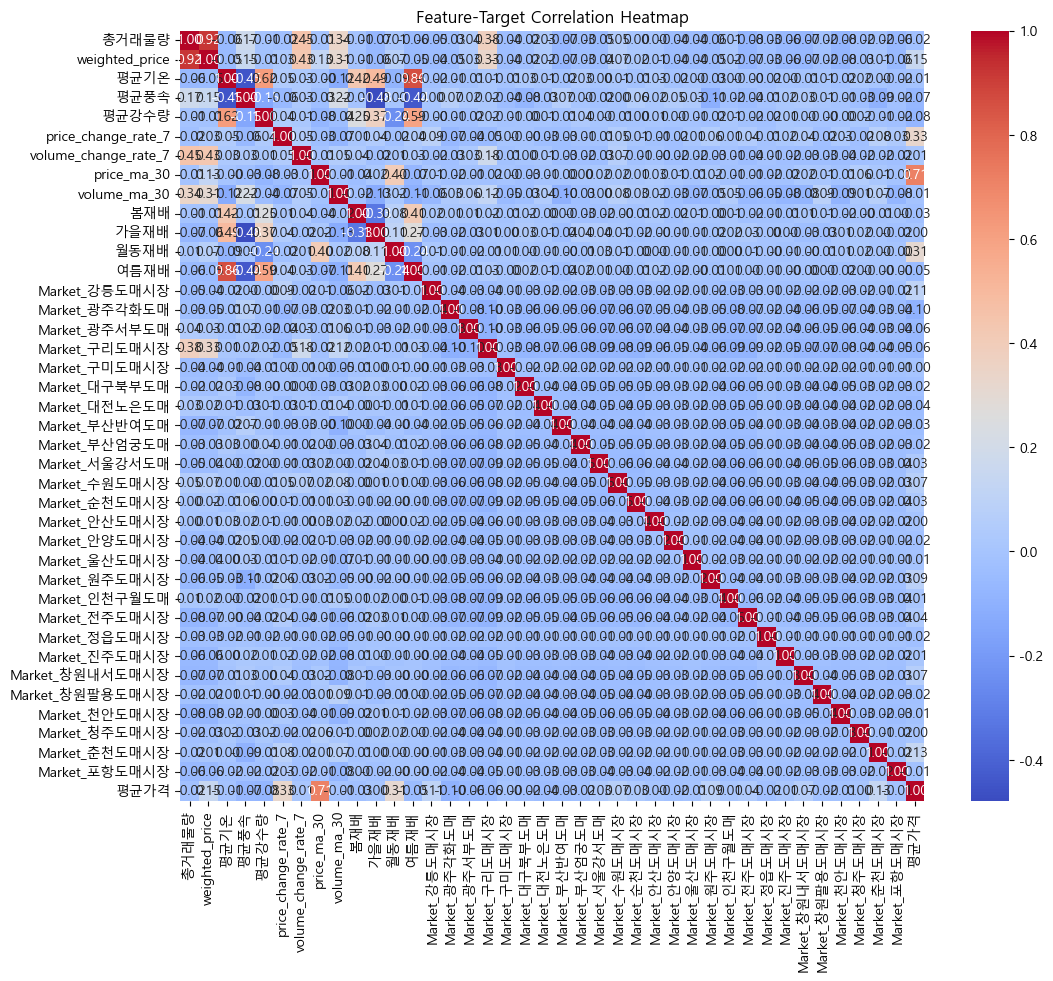

In [270]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import seaborn as sns
import matplotlib.pyplot as plt

# 피처와 타겟 데이터 병합
correlation_data = filtered_df[features + ['평균가격']]

# 상관 관계 계산
correlation_matrix = correlation_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature-Target Correlation Heatmap")
plt.show()

In [276]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score


# 데이터 로드

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# Prophet 데이터 준비
prophet_df = merged_df[['DATE', '평균가격']].rename(columns={'DATE': 'ds', '평균가격': 'y'})

# Prophet 모델 초기화
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
prophet_model.fit(prophet_df)

# 향후 12개월 예측
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

# 성능 평가
test_data = prophet_df[-12:]  # 마지막 12개월 데이터를 테스트로 사용
test_forecast = forecast[-12:]['yhat'].values
mse_prophet = mean_squared_error(test_data['y'], test_forecast)
r2_prophet = r2_score(test_data['y'], test_forecast)

print(f"MSE: {mse_prophet}")
print(f"R²: {r2_prophet}")

# 결과 시각화
prophet_model.plot(forecast).show()
prophet_model.plot_components(forecast).show()


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [277]:
! pip install --upgrade prophet cmdstanpy

In [293]:
from cmdstanpy import install_cmdstan
install_cmdstan()

CmdStan install directory: C:\Users\human\.cmdstan
Installing CmdStan version: 2.35.0
Download successful, file: C:\Users\human\AppData\Local\Temp\tmppk48386y
Extracting distribution


14:54:11 - cmdstanpy - WARNING - CmdStan installation failed.
Command "make build" failed
Command: ['mingw32-make', 'build', '-j1']
failed with error [WinError 2] 지정된 파일을 찾을 수 없습니다



Unpacked download as cmdstan-2.35.0
Building version cmdstan-2.35.0, may take several minutes, depending on your system.


False

In [295]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 외생 변수 준비
exog = merged_df[['총거래물량', '평균기온', '평균강수량']].iloc[:train_size]

# SARIMAX 모델 학습
sarimax_model = SARIMAX(
    train_data,
    exog=exog,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = sarimax_model.fit()

# 테스트 데이터 예측
exog_test = merged_df[['총거래물량', '평균기온', '평균강수량']].iloc[train_size:]
sarimax_forecast = sarimax_result.forecast(steps=len(test_data), exog=exog_test)

# 성능 평가
mse_sarimax = mean_squared_error(test_data, sarimax_forecast)
r2_sarimax = r2_score(test_data, sarimax_forecast)
print(f"MSE: {mse_sarimax}, R²: {r2_sarimax}")


ModuleNotFoundError: No module named 'statsmodels'